In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

# Load the dataset
data = pd.read_csv("datasets/auto-mpg/auto-mpg.csv")

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [27]:
data.horsepower = pd.to_numeric(data.horsepower, errors='coerce')

In [13]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [19]:
corr_matrix = data[features + ['mpg']].corr()

<Axes: >

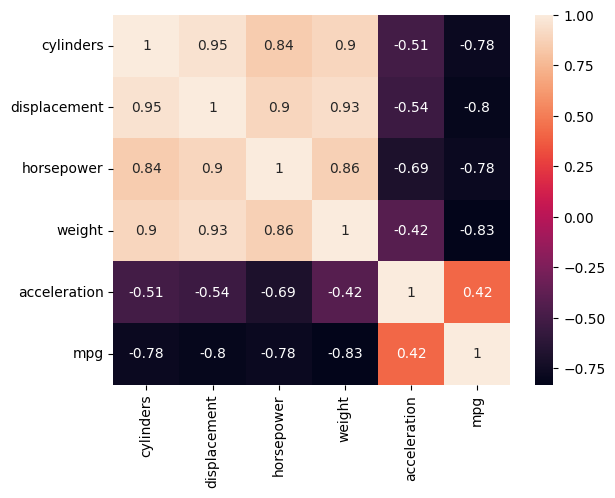

In [20]:
sns.heatmap(corr_matrix, annot=True)

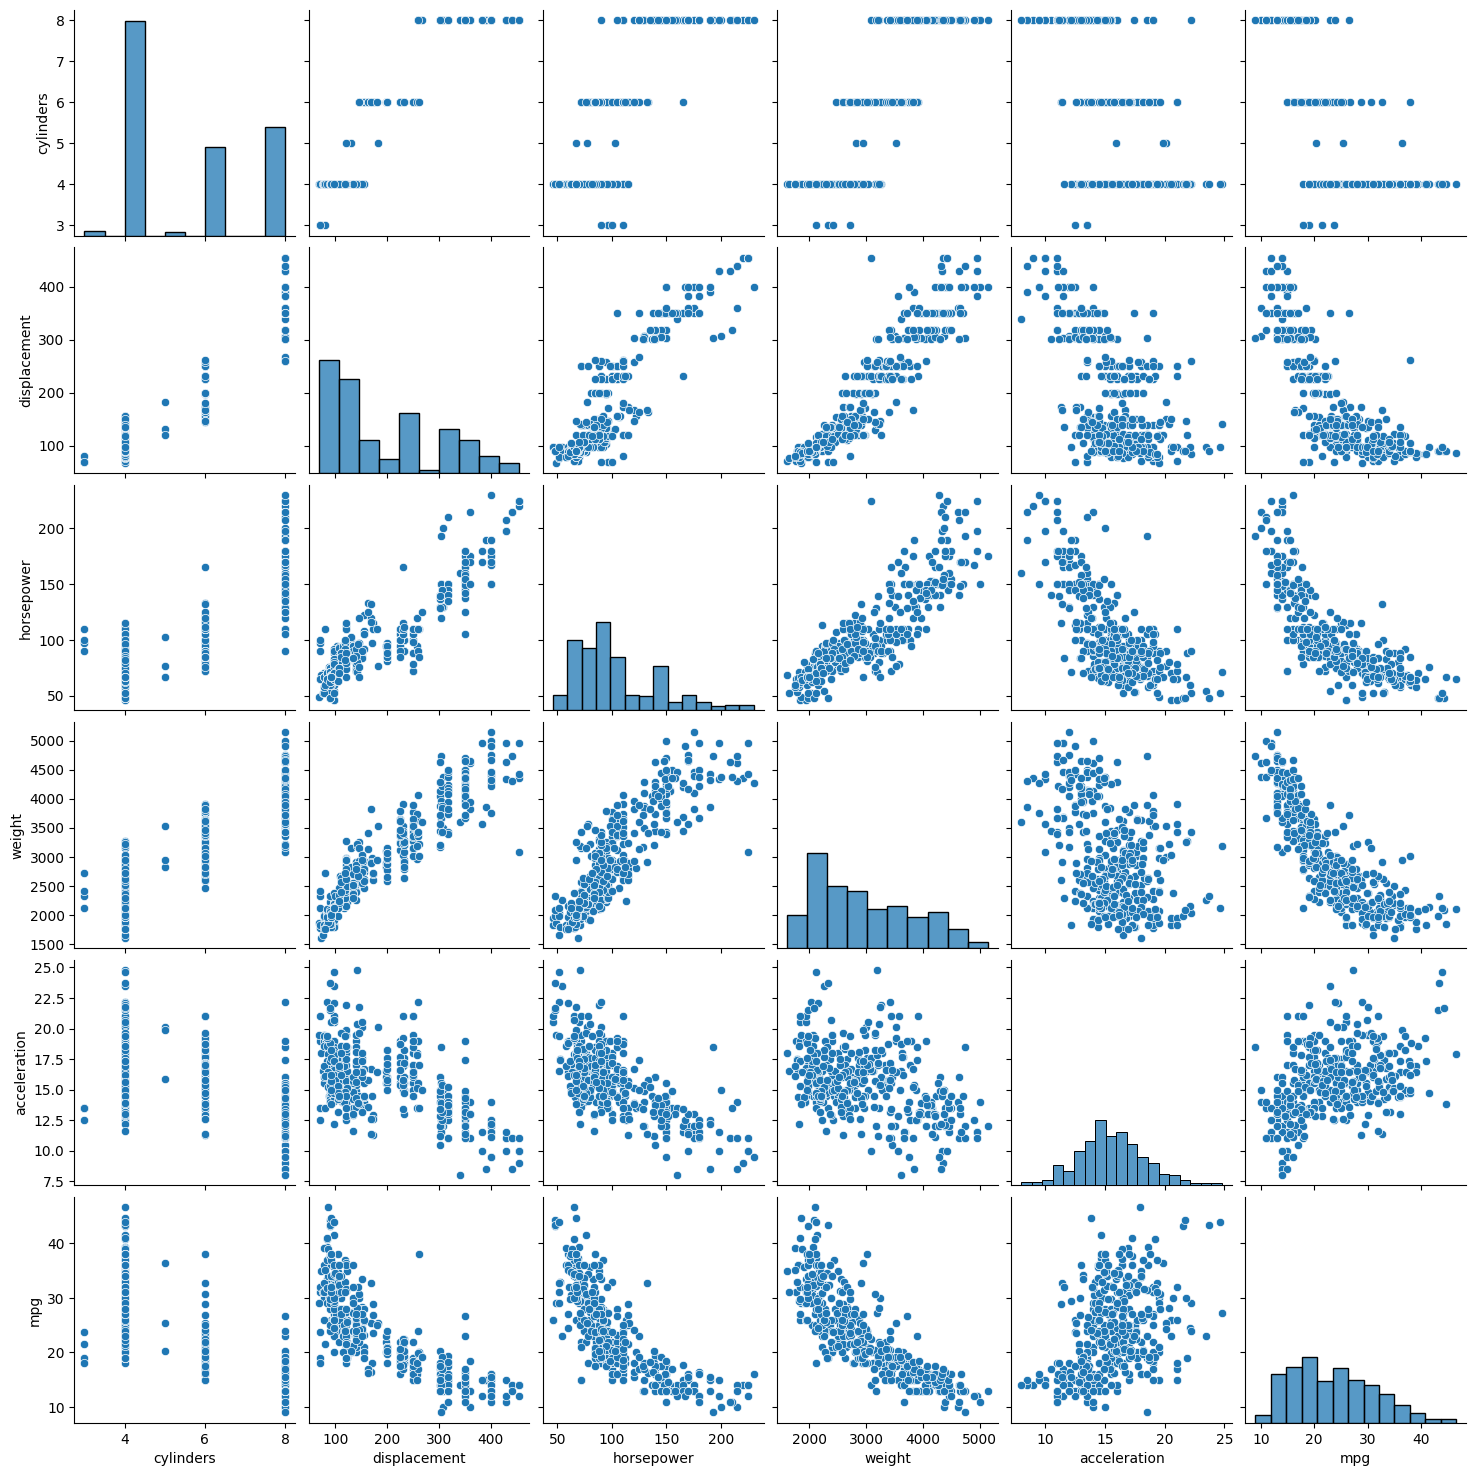

In [21]:
sns.pairplot(data[features + ['mpg']])

In [29]:
data.dropna(inplace=True)

In [33]:
for feat in features:
    pearson_corr, p_value = stats.pearsonr(data[feat], data['mpg'])
    if p_value < 0.05:
        print(f'{feat} is significantly correlated with mpg: {pearson_corr}')

cylinders is significantly correlated with mpg: -0.7776175081260225
displacement is significantly correlated with mpg: -0.8051269467104576
horsepower is significantly correlated with mpg: -0.7784267838977759
weight is significantly correlated with mpg: -0.8322442148315751
acceleration is significantly correlated with mpg: 0.4233285369027872
